# Water Pollution And Disease Analysis

## Importing necessary libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Preprocessing

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv("water_pollution_disease.csv")

# Display the first 10 rows of the DataFrame
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


Country   Region  Year Water Source Type  Contaminant Level (ppm)  \
0     Mexico    North  2015              Lake                     6.06   
1     Brazil     West  2017              Well                     5.24   
2  Indonesia  Central  2022              Pond                     0.24   
3    Nigeria     East  2016              Well                     7.91   
4     Mexico    South  2005              Well                     0.12   
5   Ethiopia     West  2013               Tap                     2.93   
6      China     East  2022             River                     0.06   
7     Mexico  Central  2024            Spring                     3.76   
8  Indonesia    North  2014              Well                     0.63   
9    Nigeria  Central  2013              Well                     9.14   

   pH Level  Turbidity (NTU)  Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
0      7.12             3.93                     4.28                  8.28   
1      7.84             4.79                     3.86                 15.74   
2      6.43             0.79                     3.42                 36.67   
3      6.71             1.96                     3.12                 36.92   
4      8.16             4.22                     9.15                 49.35   
5      8.21             4.03                     8.66                 31.35   
6      6.11             3.12                     6.97                 44.98   
7      6.42             1.35                     9.99                  2.73   
8      6.29             1.42                     9.67                 28.31   
9      6.45             0.62                     7.59                 45.99   

   Lead Concentration (µg/L)  ...  Cholera Cases per 100,000 people  \
0                       7.89  ...                                33   
1                      14.68  ...                                27   
2                       9.96  ...                                39   
3                       6.77  ...                                33   
4                      12.51  ...                                31   
5                      16.74  ...                                22   
6                       1.23  ...                                23   
7                      19.44  ...                                 0   
8                       1.93  ...                                23   
9                      10.23  ...                                 2   

  Typhoid Cases per 100,000 people  \
0                               44   
1                                8   
2                               50   
3                               13   
4                               68   
5                               55   
6                               90   
7                               10   
8                               29   
9                               38   

   Infant Mortality Rate (per 1,000 live births)  GDP per Capita (USD)  \
0                                          76.16                 57057   
1                                          77.30                 17220   
2                                          48.45                 86022   
3                                          95.66                 31166   
4                                          58.78                 25661   
5                                          70.13                 84334   
6                                          92.59                  6726   
7                                          67.30                 76593   
8                                          44.32                  5470   
9                                           4.43                 72858   

   Healthcare Access Index (0-100)  Urbanization Rate (%)  \
0                            96.92                  84.61   
1                            84.73                  73.37   
2                            58.37                  72.86   
3                            39.07                  71.07   

In [6]:
# Display basic info and the first few rows
df_info = df.info()
df_description = df.describe(include='all')

df_info, df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

(None,
        Country Region         Year Water Source Type  Contaminant Level (ppm)  \
 count     3000   3000  3000.000000              3000              3000.000000   
 unique      10      5          NaN                 6                      NaN   
 top        USA   East          NaN             River                      NaN   
 freq       319    625          NaN               538                      NaN   
 mean       NaN    NaN  2012.012667               NaN                 4.954390   
 std        NaN    NaN     7.229287               NaN                 2.860072   
 min        NaN    NaN  2000.000000               NaN                 0.000000   
 25%        NaN    NaN  2006.000000               NaN                 2.560000   
 50%        NaN    NaN  2012.000000               NaN                 4.950000   
 75%        NaN    NaN  2018.000000               NaN                 7.400000   
 max        NaN    NaN  2024.000000               NaN                10.000000   
 
       

###### The dataset water_pollution_disease.csv contains 3,000 entries and 24 columns related to water quality, pollution metrics, demographics, and disease statistics across multiple countries and years. 

In [8]:
# checking for missing values 
missing_values = df.isnull().sum()
missing_values

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [9]:
# Copy the DataFrame
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']

# Applying Label Encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Showing the result of encoding
df_encoded[categorical_cols].head()


Country  Region  Water Source Type  Water Treatment Method
0        6       2                  0                       2
1        1       4                  5                       0
2        5       0                  1                       3
3        7       1                  5                       0
4        6       3                  5                       2

###### The categorical columns have been successfully converted to numerical form using Label Encoding:

###### Country, Region, Water Source Type, and Water Treatment Method are now represented as integers.

###### Each unique category was assigned a distinct number.

In [11]:
map_ppm = px.choropleth(df, locations="Country", locationmode='country names',
                    color="Contaminant Level (ppm)", # column with values to map to color
                    hover_name="Country", # column to display on hover
                    title='Contaminant Level (ppm) by Country')
map_ppm.show()

###### From the map, we can observe the distribution of 'Contaminant Level (ppm)' across different countries. 
######  Countries with higher contaminant levels are represented by darker shades on the map.
######  Conversely, countries with lower levels are shown in lighter shades.
######  This visualization helps in identifying regions that might be more affected by water pollution based on the provided data.

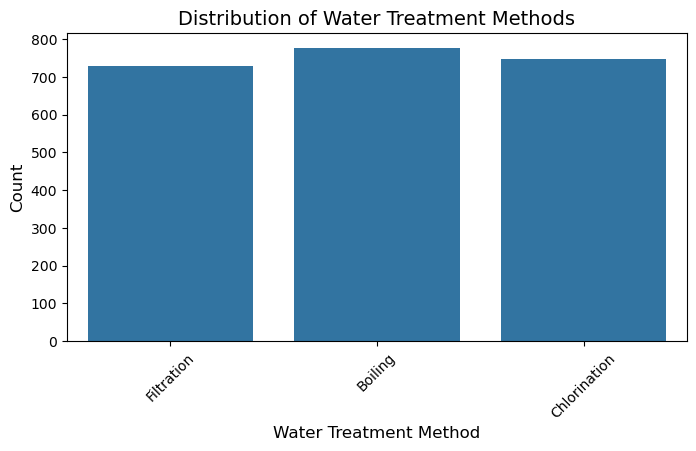

In [13]:
# Bar plot for cheking water treatment method

plt.figure(figsize=(8,4))  
sns.countplot(x="Water Treatment Method",data=df)
plt.xticks(rotation=45)  
plt.xlabel("Water Treatment Method", fontsize=12) 
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Water Treatment Methods", fontsize=14)  

plt.show()

###### Here the bar plots of water treatment method showing that hight use of Boling method for the treatment.

In [15]:
# Features to be standardized
features_to_scale = [
    'GDP per Capita (USD)',
    'Population Density (people per km²)',
    'Bacteria Count (CFU/mL)',
    'Lead Concentration (µg/L)',
    'Nitrate Level (mg/L)',
    'Contaminant Level (ppm)',
    'Rainfall (mm per year)',
    'Temperature (°C)',
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Display the first few rows of scaled features
df_encoded[features_to_scale].head()


GDP per Capita (USD)  Population Density (people per km²)  \
0              0.245534                             0.309326   
1             -1.147661                            -0.958204   
2              1.258510                            -1.583143   
3             -0.659936                             0.175158   
4             -0.852459                            -0.322674   

   Bacteria Count (CFU/mL)  Lead Concentration (µg/L)  Nitrate Level (mg/L)  \
0                 0.597773                  -0.372229             -1.158418   
1                -0.256066                   0.799011             -0.644033   
2                -0.110732                  -0.015165              0.799141   
3                 0.901717                  -0.565423              0.816380   
4                 1.183303                   0.424697              1.673458   

   Contaminant Level (ppm)  Rainfall (mm per year)  Temperature (°C)  \
0                 0.386632                1.478103         -1.299780   
1                 0.099878               -0.024284         -0.273880   
2                -1.648621                0.589884          0.136822   
3                 1.033576               -0.801170         -1.398178   
4                -1.690585                0.860264          0.967639   

   Diarrheal Cases per 100,000 people  Cholera Cases per 100,000 people  \
0                            1.542280                          0.610529   
1                           -0.886799                          0.191833   
2                            0.168115                          1.029225   
3                           -1.712686                          0.610529   
4                            1.500639                          0.470963   

   Typhoid Cases per 100,000 people  \
0                         -0.181854   
1                         -1.424118   
2                          0.025190   
3                         -1.251582   
4                          0.646323   

   Infant Mortality Rate (per 1,000 live births)  
0                                       0.890639  
1                                       0.930694  
2                                      -0.082988  
3                                       1.575797  
4                                       0.279970

###### The selected numerical features (like GDP, Population Density, Bacteria Count, etc.) have been successfully standardized using StandardScaler. Now all these features are on a similar scale with mean ≈ 0 and standard deviation ≈ 1, which is essential for many ML algorithms like SVM, KMeans, and PCA.

## Exploratory Data Analysis 

In [18]:

# Select relevant numerical columns for EDA
numerical_cols = [
    'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)',
    'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
    'Access to Clean Water (% of Population)', 'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
    'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
    'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
    'Temperature (°C)', 'Population Density (people per km²)'
]

basic_stats = df[numerical_cols].describe()

basic_stats

Contaminant Level (ppm)     pH Level  Turbidity (NTU)  \
count              3000.000000  3000.000000      3000.000000   
mean                  4.954390     7.255847         2.480023   
std                   2.860072     0.720464         1.419984   
min                   0.000000     6.000000         0.000000   
25%                   2.560000     6.630000         1.257500   
50%                   4.950000     7.280000         2.460000   
75%                   7.400000     7.870000         3.660000   
max                  10.000000     8.500000         4.990000   

       Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
count              3000.000000            3000.00000   
mean                  6.492850              25.08025   
std                   2.027966              14.50517   
min                   3.000000               0.05000   
25%                   4.710000              12.52500   
50%                   6.490000              24.79000   
75%                   8.252500              37.91000   
max                  10.000000              49.99000   

       Lead Concentration (µg/L)  Bacteria Count (CFU/mL)  \
count                3000.000000              3000.000000   
mean                   10.047913              2488.477333   
std                     5.798238              1431.421553   
min                     0.000000                 0.000000   
25%                     5.120000              1268.000000   
50%                    10.065000              2469.000000   
75%                    15.032500              3736.250000   
max                    20.000000              4998.000000   

       Access to Clean Water (% of Population)  \
count                              3000.000000   
mean                                 64.612333   
std                                  20.308463   
min                                  30.010000   
25%                                  47.027500   
50%                                  64.780000   
75%                                  82.302500   
max                                  99.990000   

       Diarrheal Cases per 100,000 people  Cholera Cases per 100,000 people  \
count                         3000.000000                        3000.00000   
mean                           249.776667                          24.25100   
std                            144.111543                          14.33259   
min                              0.000000                           0.00000   
25%                            124.000000                          12.00000   
50%                            248.000000                          24.00000   
75%                            378.000000                          37.00000   
max                            499.000000                          49.00000   

       Typhoid Cases per 100,000 people  \
count                       3000.000000   
mean                          49.270000   
std                           28.984165   
min                            0.000000   
25%                           24.000000   
50%                           49.000000   
75%                           75.000000   
max                           99.000000   

       Infant Mortality Rate (per 1,000 live births)  GDP per Capita (USD)  \
count                                    3000.000000           3000.000000   
mean                                       50.811900          50036.196667   
std                                        28.465323          28598.750508   
min                                         2.060000            521.000000   
25%                                        26.467500          25010.250000   
50%                                        50.230000          49621.500000   
75%                                        76.260000          74778.250000   
max                                        99.990000          99948.000000   

       Healthcare Access Index (0-100)  Urbanization Rate (%)  \
count                      3000.000000            3000.0

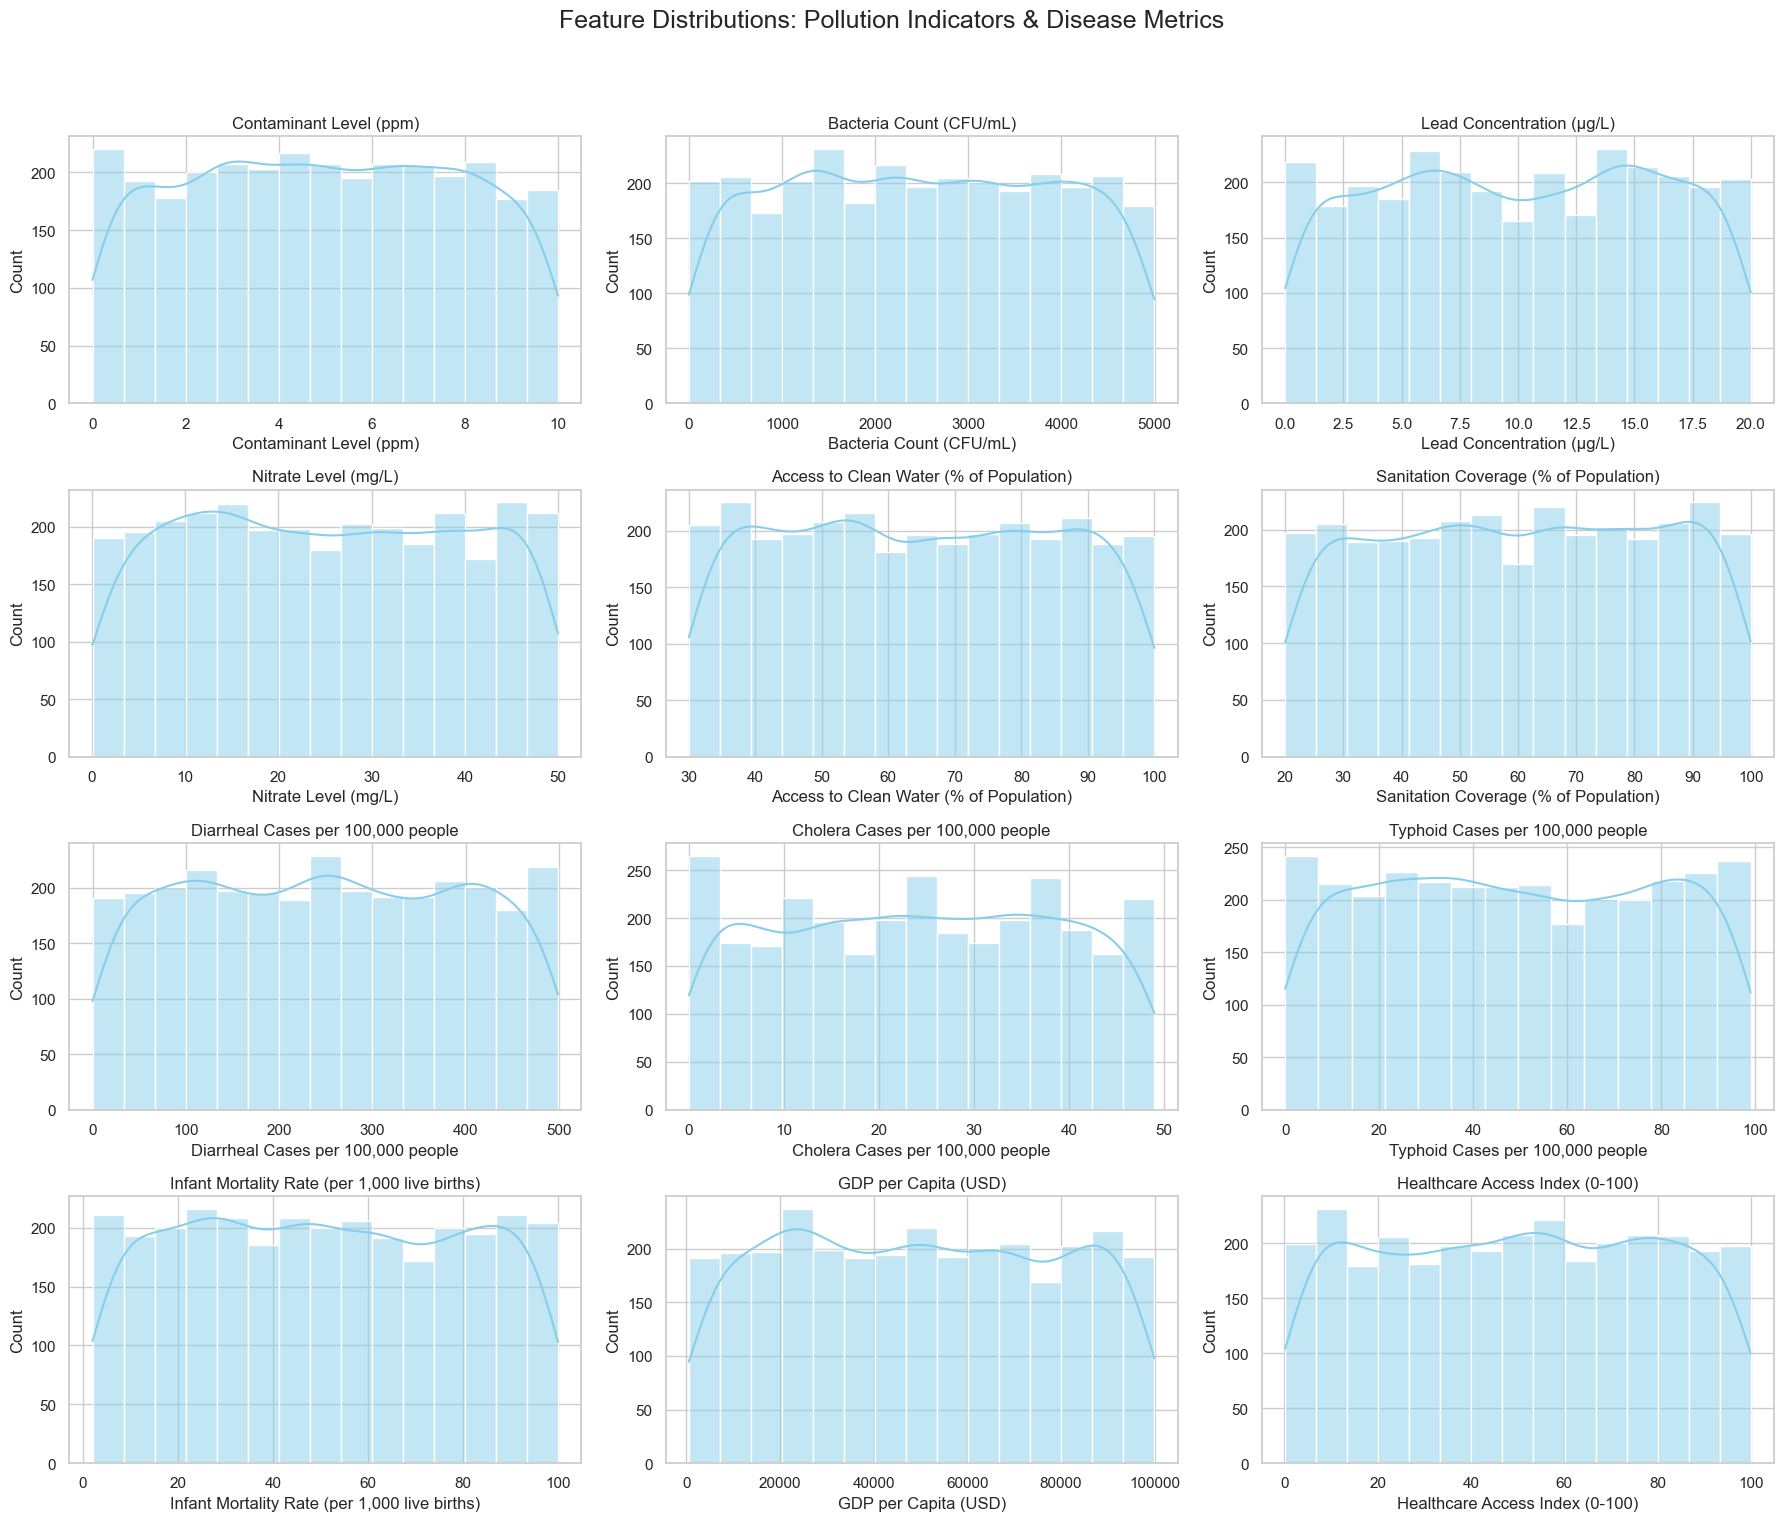

In [19]:
# Set up the plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle("Feature Distributions: Pollution Indicators & Disease Metrics", fontsize=18)

# Select features to plot
features_to_plot = [
    'Contaminant Level (ppm)', 'Bacteria Count (CFU/mL)', 'Lead Concentration (µg/L)',
    'Nitrate Level (mg/L)', 'Access to Clean Water (% of Population)', 'Sanitation Coverage (% of Population)',
    'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)',
    'GDP per Capita (USD)', 'Healthcare Access Index (0-100)'
]

# Plot histograms for each selected feature
for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    sns.histplot(df[feature], kde=True, ax=ax, color="skyblue")
    ax.set_title(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###### Here are the distribution plots of key pollution metrics (e.g., contaminants, bacteria, nitrate, lead) and disease incidence indicators (e.g., diarrhea, cholera, typhoid, infant mortality):
 ###### Pollution indicators like Bacteria Count and Nitrate Level are right-skewed, indicating a few regions have very high contamination.

###### Disease cases show a similar skewed pattern, suggesting certain areas are heavily affected.

###### Access to clean water, sanitation, and healthcare index are mostly concentrated at higher values in many regions, but some areas still lag behind.

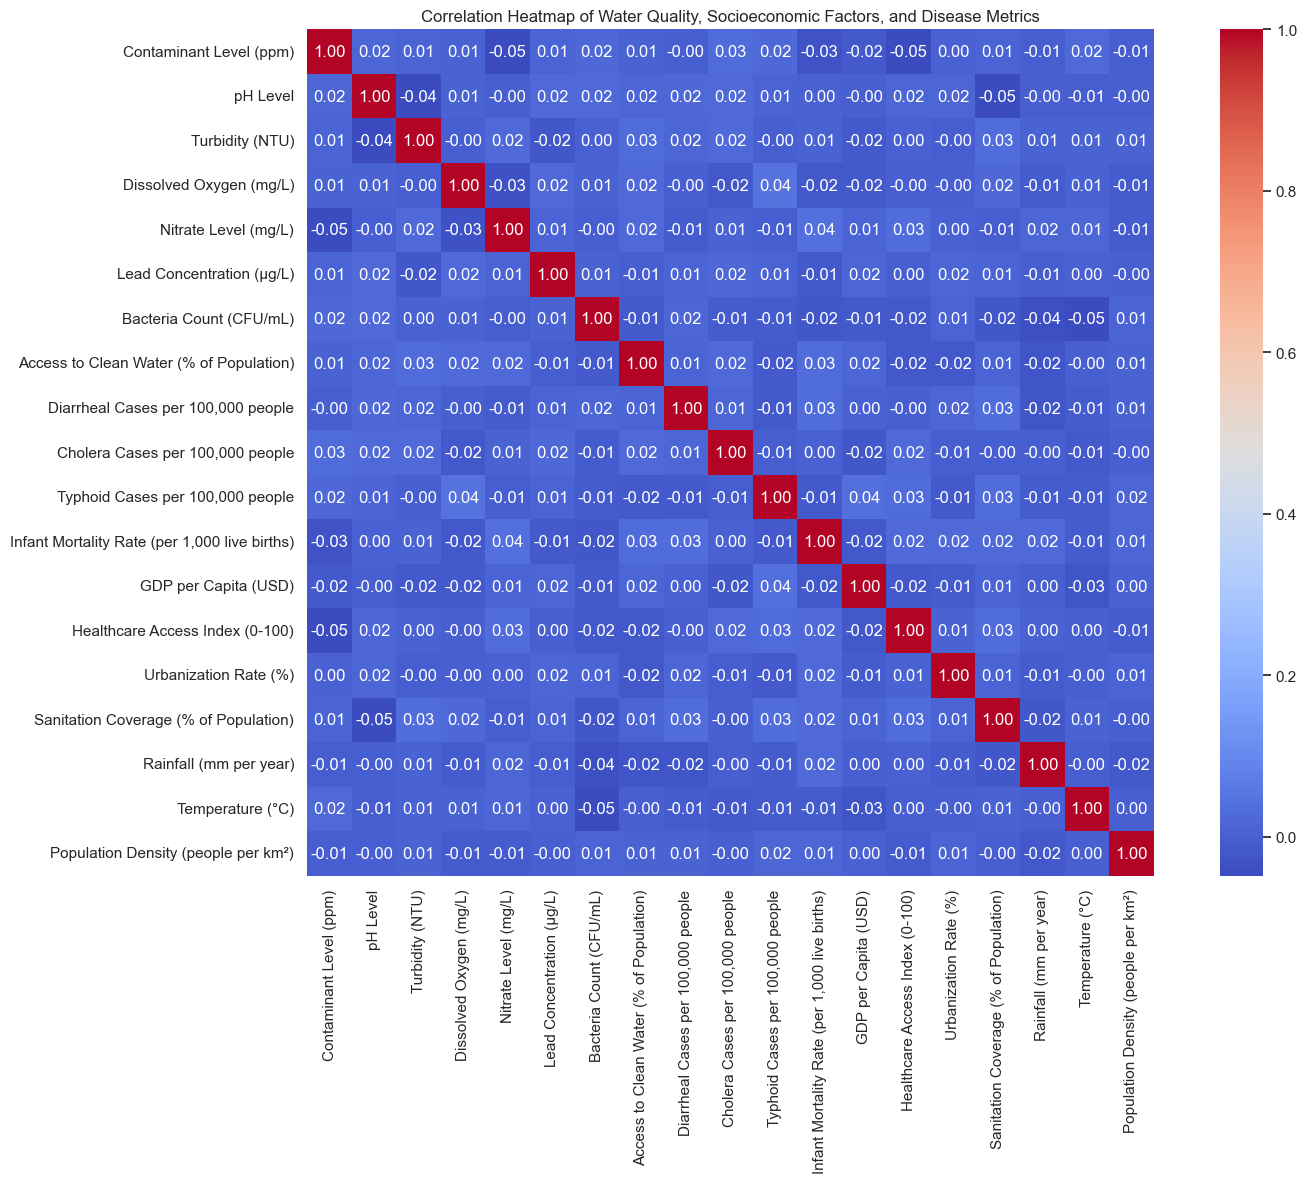

In [21]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Water Quality, Socioeconomic Factors, and Disease Metrics")
plt.tight_layout()
plt.show()

###### Here is the correlation heatmap showing relationships between water quality indicators, socioeconomic factors, and disease metrics. Key insights you can draw:

Positive correlations:

Bacteria Count, Lead, Nitrate, and Contaminant Level show positive correlation with disease cases and Infant Mortality.

Negative correlations:

Access to Clean Water, Sanitation Coverage, and Healthcare Access are negatively correlated with disease metrics.

GDP per Capita and Urbanization also correlate with better health outcomes.

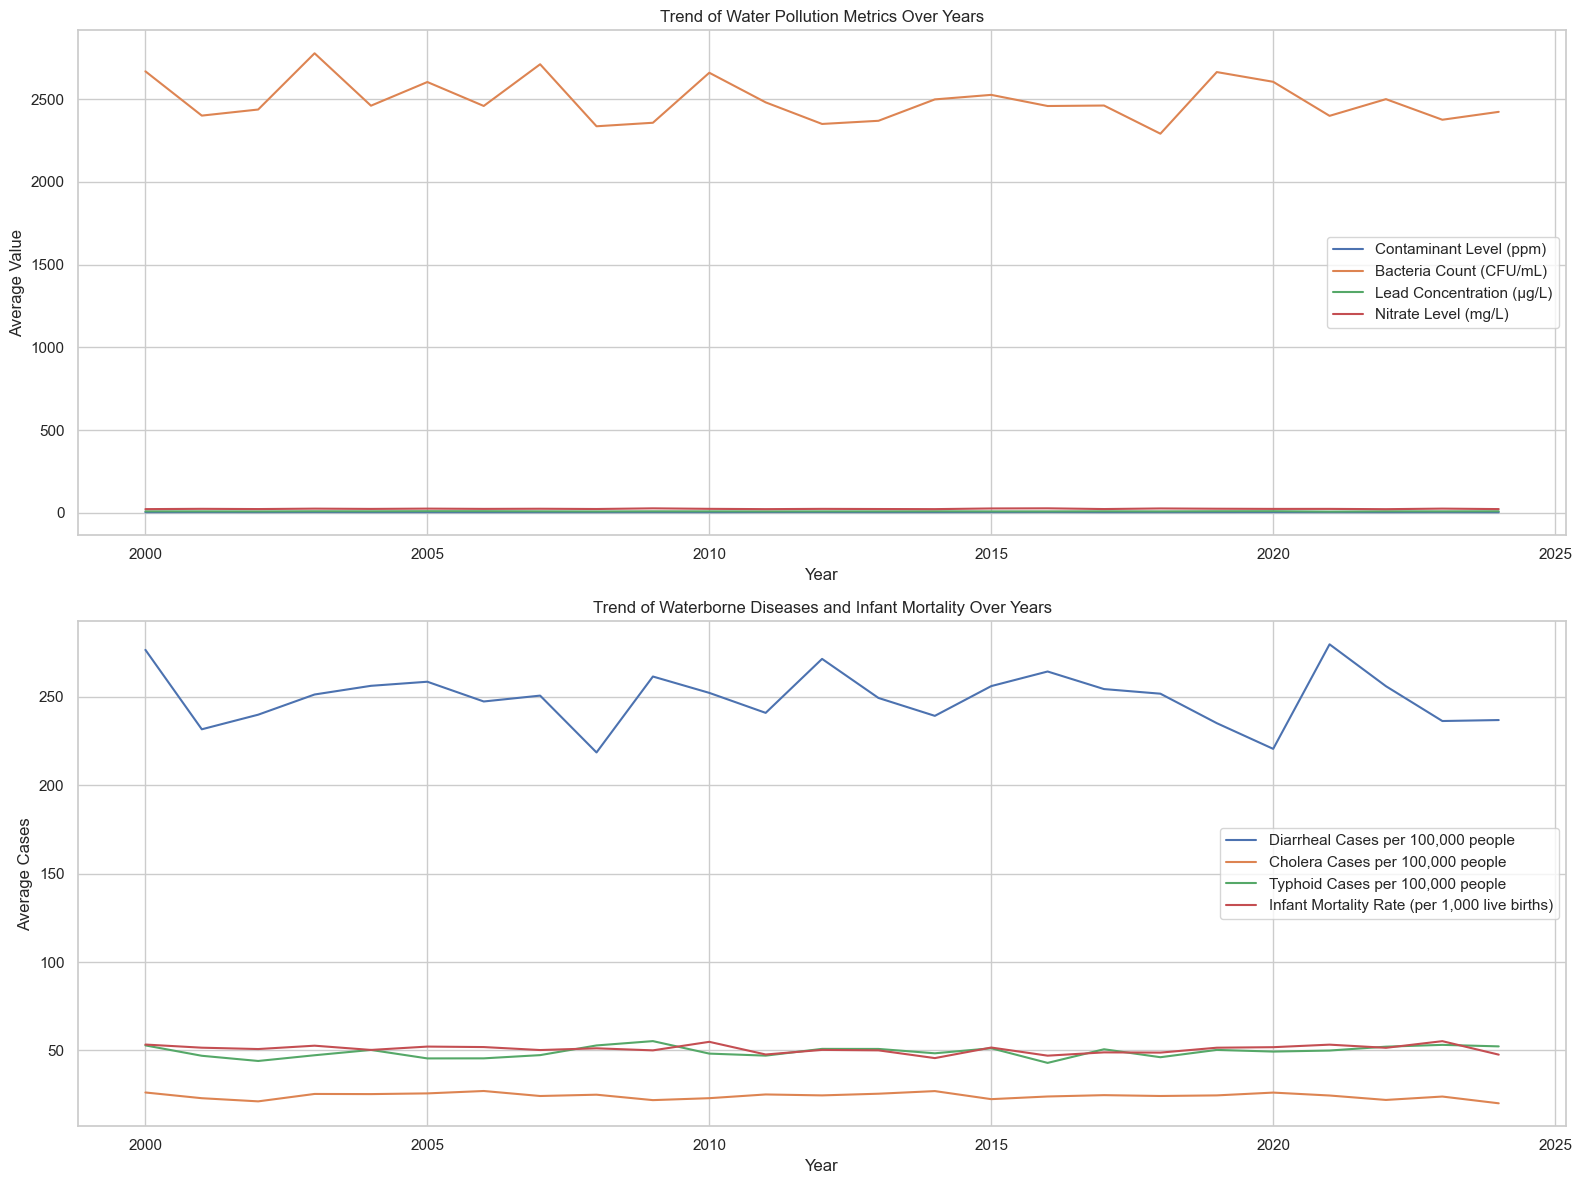

In [23]:
# Group data by Year and calculate the mean for selected features
yearly_trends = df.groupby("Year")[
    [
        'Contaminant Level (ppm)', 'Bacteria Count (CFU/mL)', 'Lead Concentration (µg/L)',
        'Nitrate Level (mg/L)', 'Diarrheal Cases per 100,000 people',
        'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
        'Infant Mortality Rate (per 1,000 live births)'
    ]
].mean().reset_index()

# Plot time trends
plt.figure(figsize=(16, 12))

# Pollution trends
plt.subplot(2, 1, 1)
for col in ['Contaminant Level (ppm)', 'Bacteria Count (CFU/mL)', 'Lead Concentration (µg/L)', 'Nitrate Level (mg/L)']:
    sns.lineplot(data=yearly_trends, x='Year', y=col, label=col)
plt.title("Trend of Water Pollution Metrics Over Years")
plt.ylabel("Average Value")
plt.xlabel("Year")
plt.legend()

# Disease trends
plt.subplot(2, 1, 2)
for col in ['Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people',
            'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)']:
    sns.lineplot(data=yearly_trends, x='Year', y=col, label=col)
plt.title("Trend of Waterborne Diseases and Infant Mortality Over Years")
plt.ylabel("Average Cases")
plt.xlabel("Year")
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
# Group by Region and calculate mean of disease columns
region_disease_avg = df.groupby("Region")[[
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]].mean().sort_values(by='Diarrheal Cases per 100,000 people', ascending=False)

print(region_disease_avg)


         Diarrheal Cases per 100,000 people  Cholera Cases per 100,000 people  \
Region                                                                          
South                            258.794828                         23.943103   
East                             254.177600                         24.336000   
North                            247.869492                         23.949153   
West                             245.119529                         24.220539   
Central                          243.083470                         24.777414   

         Typhoid Cases per 100,000 people  \
Region                                      
South                           47.881034   
East                            50.644800   
North                           48.593220   
West                            49.314815   
Central                         49.792144   

         Infant Mortality Rate (per 1,000 live births)  
Region                                                  
So

In [25]:
# Group by Country
country_disease_avg = df.groupby("Country")[[
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]].mean().sort_values(by='Diarrheal Cases per 100,000 people', ascending=False)

print(country_disease_avg.head(10))  # View top 10 affected countries


            Diarrheal Cases per 100,000 people  \
Country                                          
Brazil                              261.340206   
Mexico                              260.166667   
India                               254.137931   
Pakistan                            250.187919   
Ethiopia                            248.877133   
Bangladesh                          248.570447   
Indonesia                           248.177632   
Nigeria                             246.930159   
China                               241.360129   
USA                                 239.965517   

            Cholera Cases per 100,000 people  \
Country                                        
Brazil                             22.560137   
Mexico                             23.649306   
India                              25.024138   
Pakistan                           24.516779   
Ethiopia                           24.747440   
Bangladesh                         23.993127   
Indonesia      

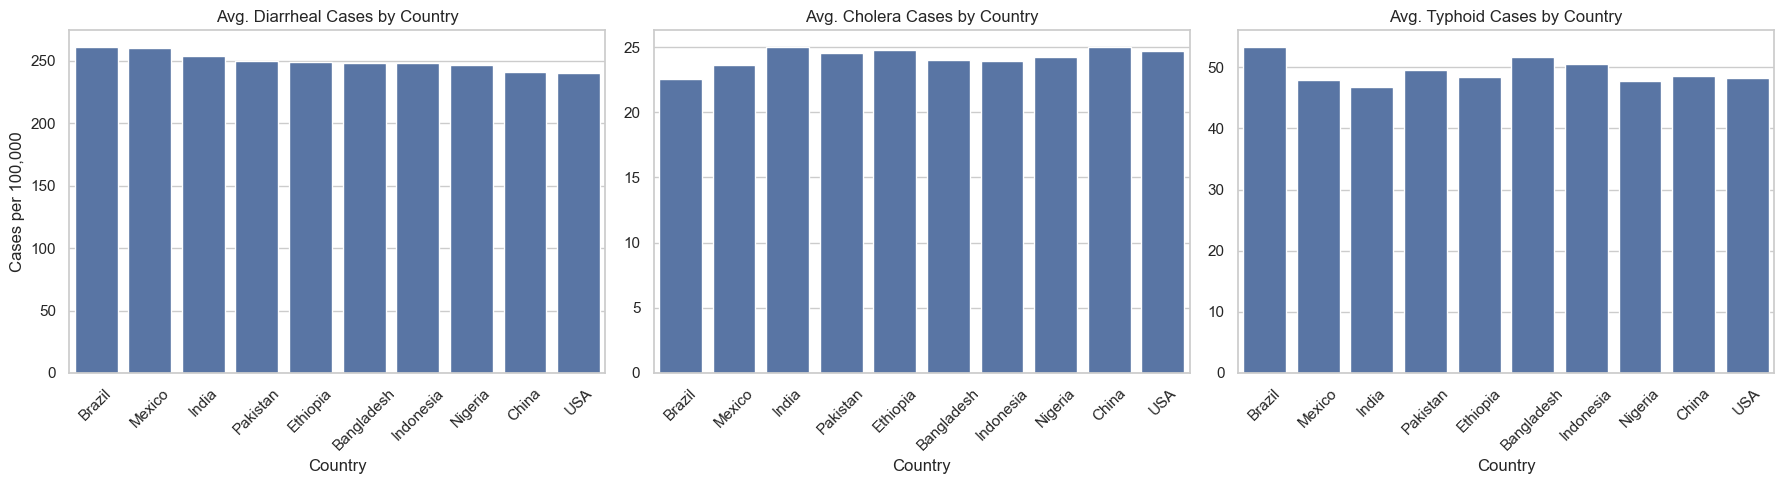

In [26]:
# Create subplots - 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Diarrheal Cases Plot
sns.barplot(
    x=country_disease_avg.index,
    y=country_disease_avg['Diarrheal Cases per 100,000 people'],
    ax=axes[0]
)
axes[0].set_title('Avg. Diarrheal Cases by Country')
axes[0].set_ylabel('Cases per 100,000')
axes[0].tick_params(axis='x', rotation=45)

# Cholera Cases Plot
sns.barplot(
    x=country_disease_avg.index,
    y=country_disease_avg['Cholera Cases per 100,000 people'],
    ax=axes[1]
)
axes[1].set_title('Avg. Cholera Cases by Country')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# Typhoid Cases Plot
sns.barplot(
    x=country_disease_avg.index,
    y=country_disease_avg['Typhoid Cases per 100,000 people'],
    ax=axes[2]
)
axes[2].set_title('Avg. Typhoid Cases by Country')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()


###### These groupings will help to:

###### Identify high-risk regions or countries.

###### Compare how disease burden varies geographically.

###### Provide strong evidence for targeted intervention in your project conclusion.

## Supervised Machine Learning
Predicting Disease Metrics (Regression)

#### Diarrheal Cases prediction comparision among algorithms

In [33]:
# Load dataset
df = pd.read_csv("water_pollution_disease.csv")

# Encode categorical variables
label_encoders = {}
for col in ['Water Source Type', 'Water Treatment Method']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unused columns
df.drop(columns=['Country', 'Region', 'Year', 'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people'], inplace=True)

# Define features and target
X = df.drop(columns=['Diarrheal Cases per 100,000 people'])
y = df['Diarrheal Cases per 100,000 people']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train, predict and evaluate
Diarrheal_results = []
model_predictions_Diarrheal = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions_Diarrheal[name] = y_pred
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    Diarrheal_results.append((name, rmse, mae, r2))

# Convert results to DataFrame
Diarrheal_results_df = pd.DataFrame(Diarrheal_results, columns=["Model", "RMSE", "MAE", "R2 Score"]).sort_values(by="RMSE")
print(Diarrheal_results_df)


               Model        RMSE         MAE  R2 Score
0  Linear Regression  146.243510  127.533455 -0.006227
2      Random Forest  149.074784  129.696917 -0.045566
1      Decision Tree  203.871271  166.188333 -0.955487


###### All models currently perform poorly (negative R² scores suggest they perform worse than predicting the mean).

###### Decision Tree has the best overall metrics among them.

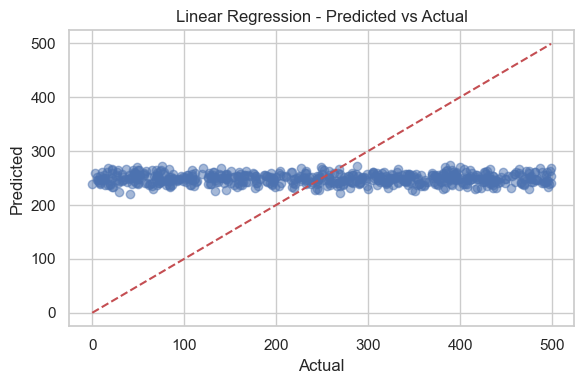

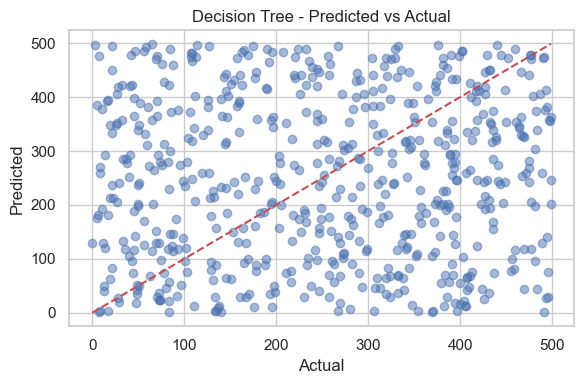

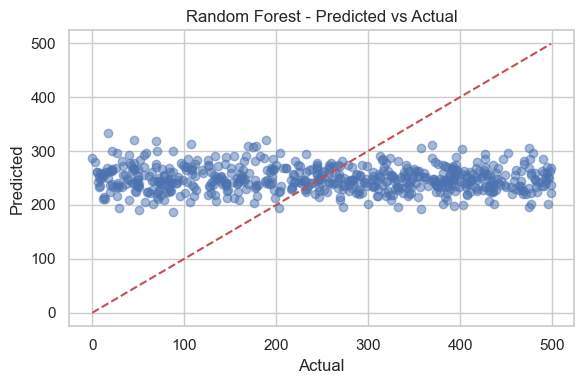

In [34]:
for name, preds in model_predictions_Diarrheal.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



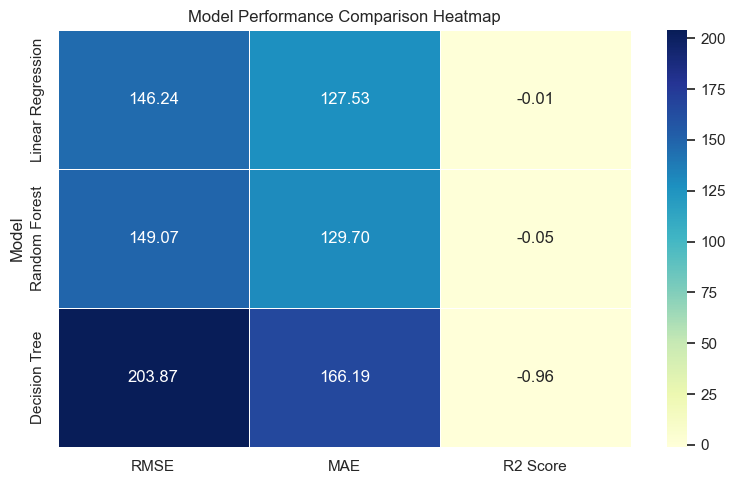

In [35]:
Diarrheal_results_df.set_index("Model", inplace=True)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(Diarrheal_results_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Model Performance Comparison Heatmap")
plt.tight_layout()
plt.show()

#### Cholera Cases prediction comparision among algorithms

In [37]:
# Load dataset
df = pd.read_csv("water_pollution_disease.csv")

# Encode categorical variables
label_encoders = {}
for col in ['Water Source Type', 'Water Treatment Method']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unused columns
df.drop(columns=['Country', 'Region', 'Year', 'Diarrheal Cases per 100,000 people', 'Typhoid Cases per 100,000 people'], inplace=True)

# Define features and target
X = df.drop(columns=['Cholera Cases per 100,000 people'])
y = df['Cholera Cases per 100,000 people']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train, predict and evaluate
Cholera_results = []
model_predictions_Cholera = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions_Cholera[name] = y_pred
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    Cholera_results.append((name, rmse, mae, r2))

# Convert results to DataFrame
Cholera_results_df = pd.DataFrame(Cholera_results, columns=["Model", "RMSE", "MAE", "R2 Score"]).sort_values(by="RMSE")
print(Cholera_results_df)

               Model       RMSE        MAE  R2 Score
0  Linear Regression  14.330365  12.370982  0.002467
2      Random Forest  14.532456  12.516767 -0.025866
1      Decision Tree  19.875697  16.310000 -0.918922


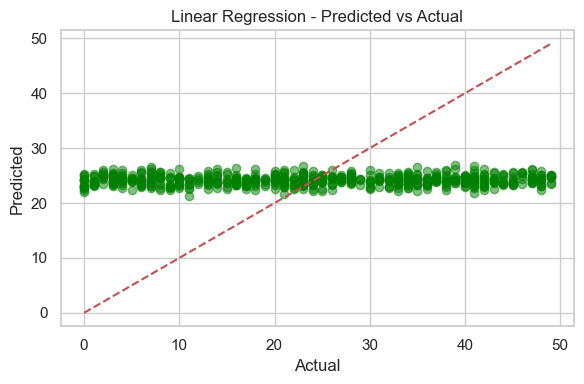

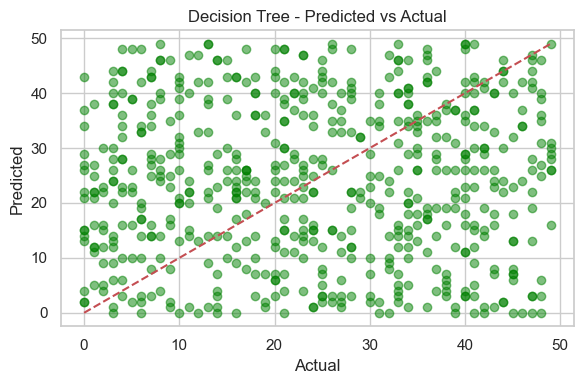

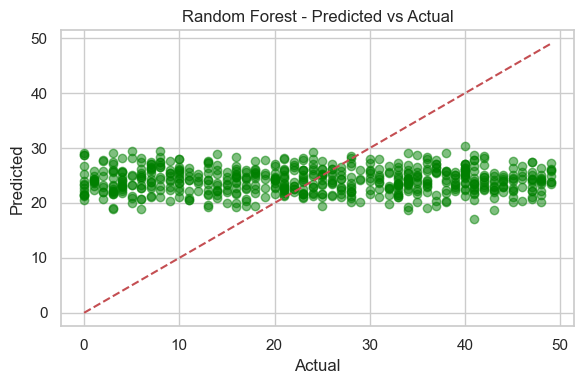

In [38]:
for name, preds in model_predictions_Cholera.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, preds, alpha=0.5, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

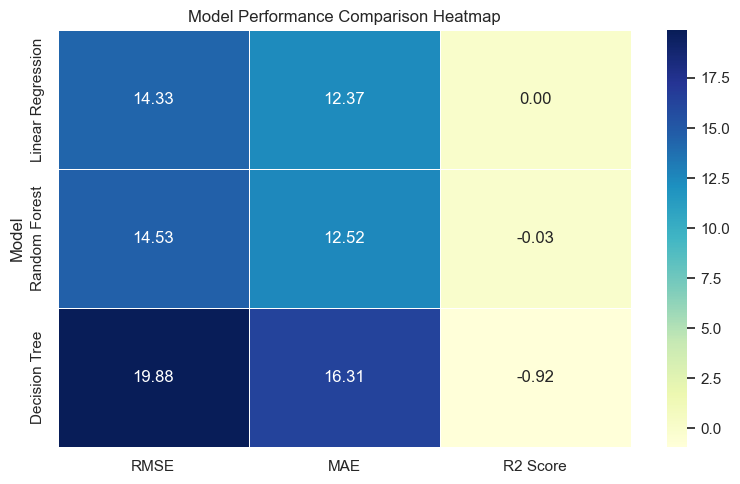

In [39]:
Cholera_results_df.set_index("Model", inplace=True)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(Cholera_results_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Model Performance Comparison Heatmap")
plt.tight_layout()
plt.show()

#### Typhoid Cases prediction comparision among algorithms

In [41]:
# Load dataset
df = pd.read_csv("water_pollution_disease.csv")

# Encode categorical variables
label_encoders = {}
for col in ['Water Source Type', 'Water Treatment Method']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unused columns
df.drop(columns=['Country', 'Region', 'Year', 'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people'], inplace=True)

# Define features and target
X = df.drop(columns=['Typhoid Cases per 100,000 people'])
y = df['Typhoid Cases per 100,000 people']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train, predict and evaluate
Typhoid_results = []
model_predictions_Typhoid = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions_Typhoid[name] = y_pred
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    Typhoid_results.append((name, rmse, mae, r2))

# Convert results to DataFrame
Typhoid_results_df = pd.DataFrame(Typhoid_results, columns=["Model", "RMSE", "MAE", "R2 Score"]).sort_values(by="RMSE")
print(Typhoid_results_df)

               Model       RMSE        MAE  R2 Score
2      Random Forest  29.191852  25.378617 -0.015363
0  Linear Regression  29.200544  25.430334 -0.015968
1      Decision Tree  40.566674  33.045000 -0.960817


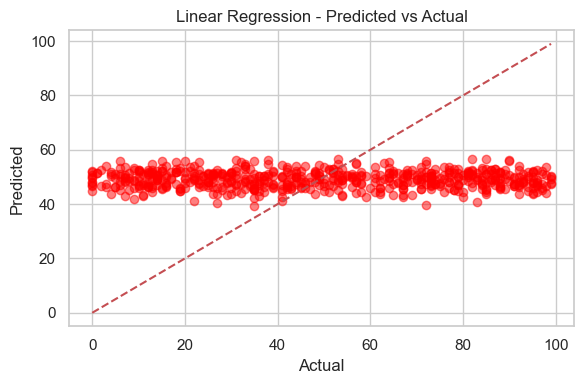

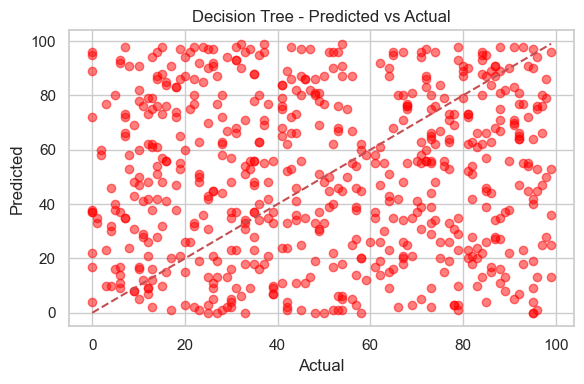

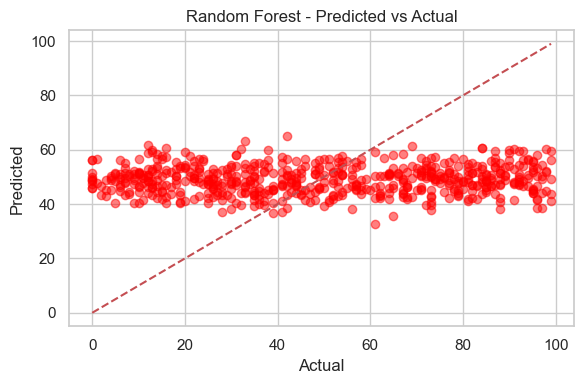

In [42]:
for name, preds in model_predictions_Typhoid.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, preds, alpha=0.5, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

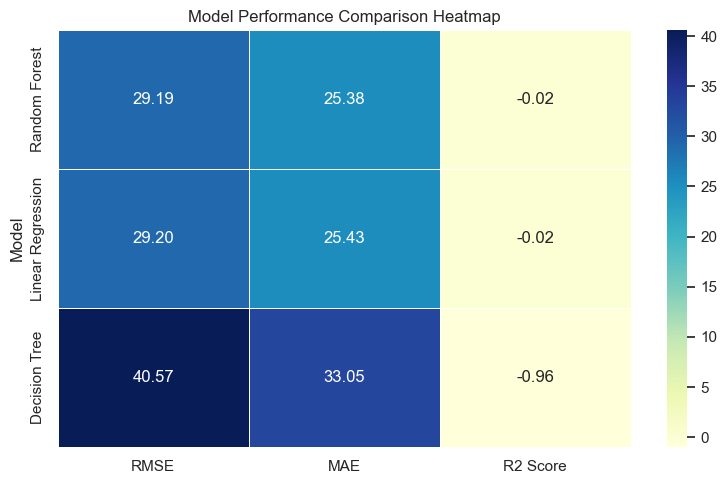

In [43]:
Typhoid_results_df.set_index("Model", inplace=True)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(Typhoid_results_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Model Performance Comparison Heatmap")
plt.tight_layout()
plt.show()

##### From the above algorithm we can conclude that Decision Tree model has predicted more accurately for all diseases. so, here Decision Tree is the best for model prediction.